In [14]:
# Uncomment the "!pip install" line below to use on Google Colab. Run this cell and restart the runtime kernel.
# https://colab.research.google.com/github/spedas/pyspedas/blob/mth5/pyspedas/mth5/examples/comparison_with_published_results.ipynb
# !pip install git+https://github.com/spedas/pyspedas.git@mth5
# !pip install git+https://github.com/kujaku11/mth5.git

^C



[notice] A new release of pip is available: 23.3 -> 23.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip
30-Nov-23 21:40:10: C:\Program Files\WindowsApps\PythonSoftwareFoundation.Python.3.9_3.9.3568.0_x64__qbz5n2kfra8p0\lib\threading.py:921: ResourceWarning: unclosed file <_io.BufferedWriter name=5>
  del self._target, self._args, self._kwargs

30-Nov-23 21:40:10: C:\Program Files\WindowsApps\PythonSoftwareFoundation.Python.3.9_3.9.3568.0_x64__qbz5n2kfra8p0\lib\threading.py:921: ResourceWarning: unclosed file <_io.BufferedReader name=6>
  del self._target, self._args, self._kwargs

30-Nov-23 21:40:10: sys:1: ResourceWarning: Unclosed socket <zmq.Socket(zmq.PUSH) at 0x19dadd0c1c0>

30-Nov-23 21:40:10: C:\Program Files\WindowsApps\PythonSoftwareFoundation.Python.3.9_3.9.3568.0_x64__qbz5n2kfra8p0\lib\threading.py:921: ResourceWarning: unclosed file <_io.BufferedReader name=7>
  del self._target, self._args, self._kwargs

30-Nov-23 21:40:10: sys:1: ResourceWarning: Uncl

   ---------------------------------------- 0.0/1.1 MB ? eta -:--:--
   --------------- ------------------------ 0.5/1.1 MB 9.6 MB/s eta 0:00:01
   ---------------------------------------  1.1/1.1 MB 12.0 MB/s eta 0:00:01
   ---------------------------------------- 1.1/1.1 MB 10.3 MB/s eta 0:00:00
^C


# Results from Heyns et al. (2020)

This notebook show example of the measurements from the Fredericksbur (FRD) station and nearby stations obtained from FDSN network.
Figure 1 by [Heyns et al. (2020)]((https://agupubs.onlinelibrary.wiley.com/doi/full/10.1029/2020SW002557)) illustrates such measurement in comparion with GIC measurments 

Heyns, M. J., Lotz, S. I., & Gaunt, C. T. (2021). Geomagnetic pulsations driving geomagnetically induced currents. Space Weather, 19, e2020SW002557. https://doi.org/10.1029/2020SW002557

In [1]:
from IPython.display import Image
Image(url= "https://agupubs.onlinelibrary.wiley.com/cms/asset/015c5548-201a-4fd0-a676-b8b872089875/swe21080-fig-0001-m.jpg", width=900, height=600)

# Plot FRD station data using PySPEDAS GMAG

To obtain the measurements from FRD station we use `themis.gmag` module, which provides access to the [large set of magnetometer data](https://themis.ssl.berkeley.edu/gmag/gmag_list.php?selyear=4000&selmonth=13&smap=on&sinfo=on&saelist=on&ae=on).
[FRD station](https://www.usgs.gov/programs/geomagnetism/science/fredericksburg-frd) is a gold standard in Space Physics. It is a part of [USGS Geomagnetic Observatory](https://www.usgs.gov/programs/geomagnetism/science/observatories). 

30-Nov-23 19:58:00: Downloading remote index: http://themis.ssl.berkeley.edu/data/themis/thg/l2/mag/frd/2015/
30-Nov-23 19:58:00: File is current: c:\work\Data\SPEDAS\themis\thg/l2/mag/frd/2015/thg_l2_mag_frd_20150622_v01.cdf
30-Nov-23 19:58:01: Time clip was applied to: thg_mag_frd


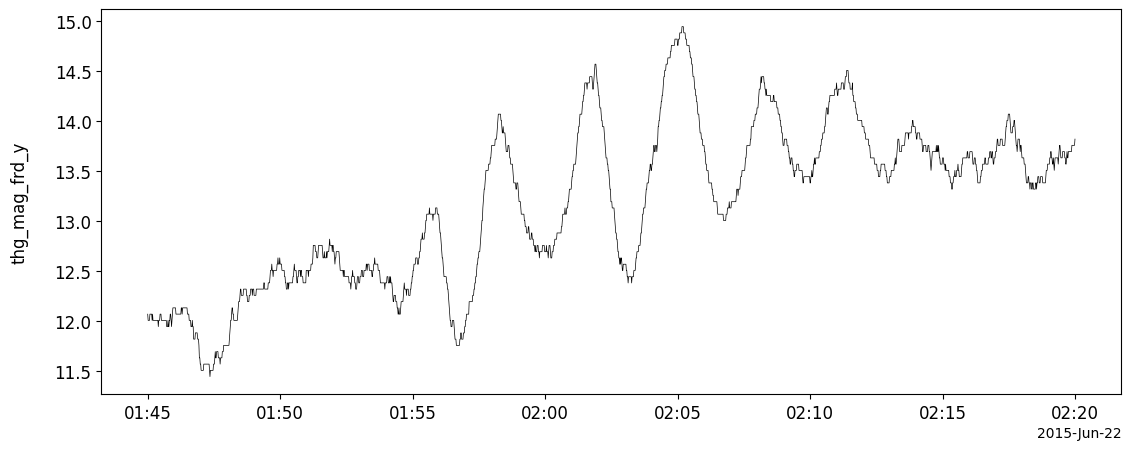

In [2]:
import pyspedas, pytplot

date_start = '2015-06-22T01:45:00'
date_end = '2015-06-22T02:20:00'
# Load data from FDR station
pyspedas.themis.gmag(sites='frd', trange=[date_start, date_end], time_clip=True)

# Split data into individual components
pytplot.split_vec('thg_mag_frd')

# Plot y component
pytplot.tplot('thg_mag_frd_y')

The output from pytplot is the same as in Figure 1 from Heyns et al. (2020) 

# Search for nearby stations

FRD station coordinates are presented in Table 1 from Heyns et al. (2020)

| Station         | Geographic latitude | Geographic longitude | Geomagnetic MLat. | Geomagnetic MLon. |
|-----------------|---------------------|----------------------|-------------------|-------------------|
| Fredericksburg  | 38.2°               | −77.4°               | 47.8°             | −0.2°             |

To find nearby station we can use the [https://ds.iris.edu/gmap/](https://ds.iris.edu/gmap/) webpage.

In [3]:
from IPython.display import IFrame
from datetime import datetime, timedelta

date_fmt = "%Y-%m-%dT%H:%M:%S"
sdate = datetime.strptime(date_start, date_fmt).strftime('%Y-%m-%d') # Only date 
edate =(datetime.strptime(date_start, date_fmt) + timedelta(days=1)).strftime('%Y-%m-%d') # Only date but plus one day
net = '*' # Select all networks
lat = 38.2 # Geographic latitude
lon = -77.4 # Geographic longitude
rad = 8  # Radius of the area

# Construct url using fstring
url= f'https://ds.iris.edu/gmap/#network={net}&starttime={sdate}&endtime={edate}&latitude={lat}&longitude={lon}&maxradius={rad}&drawingmode=radial&planet=earth'
print(url)
IFrame(url, 900,500)

https://ds.iris.edu/gmap/#network=*&starttime=2015-06-22&endtime=2015-06-23&latitude=38.2&longitude=-77.4&maxradius=8&drawingmode=radial&planet=earth


# Limit stations of interest

The previous request provided multiple stations, including FRD. Now we need to limit the search to the stations that can provide magnetometer data in IRIS. According to the Standard for the Exchange of Earthquake Data (or **SEED**) [reference manual appendix A](https://www.fdsn.org/pdf/SEEDManual_V2.4_Appendix-A.pdf), the SEED format uses three letters to name the channels (Band code, Instrument code and Orientation code). We are interested in magnetomenter data which has an instrument code **F**. However, the wildcard '\*F\*' will return channels that also ends with 'F' and do not represent magnetic field data. Hence, we include only list of channels that correspond to low frequency magnetic field measurements: MF\*, LF\*, VF\*, UF\*. Note, that we did not include the orientation code, which can be **Z**, **N**, **E** (Vertical, North-South, East-West). To exclude channels that may represent something else (e.g.,  **VFP** Packet Buffer Usage), we can further limit our search to East-West oriented magnetomenter: MFE, LFE, VFE, UFE

In [4]:
channel = "MFE,LFE,VFE,UFE" 
url= f'https://ds.iris.edu/gmap/#network={net}&channel={channel}&starttime={sdate}&endtime={edate}&latitude={lat}&longitude={lon}&maxradius={rad}&drawingmode=radial&planet=earth'
print(url)
IFrame(url, 900,650)

https://ds.iris.edu/gmap/#network=*&channel=MFE,LFE,VFE,UFE&starttime=2015-06-22&endtime=2015-06-23&latitude=38.2&longitude=-77.4&maxradius=8&drawingmode=radial&planet=earth


# Plot station data using PySPEDAS MTH5 

Let select station  **REU49** from network **4P** and load data using mth5 format.

To obtain the station data we use `load_fdsn` function of `mth5` module. Not that we use `nodownload` flag, which prevents recurrent download of the data. Once the data is obtained for selected period the .h5 cache file is created. `nodownload=False` will force to create the .h5 files every time.

30-Nov-23 19:58:01: loguru synchronized with pyspedas logging


2023-11-30T19:58:04.784843-0800 | INFO | mth5.mth5 | close_mth5 | Flushing and closing c:\work\Data\SPEDAS\mth5\4P_REU49_20150622T014500_20150622T022000.h5


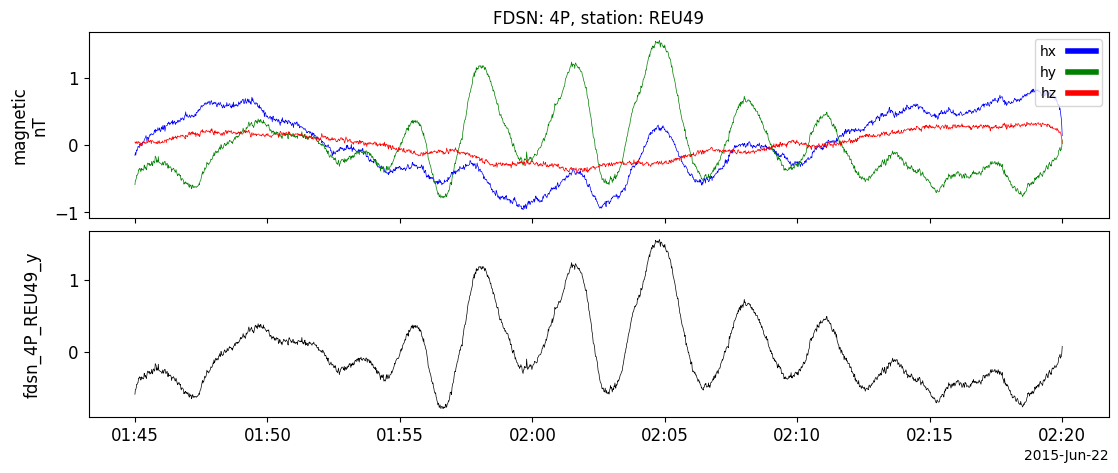

In [5]:
from pyspedas.mth5.load_fdsn import load_fdsn

load_fdsn(network="4P", station="REU49", trange=[date_start, date_end], nodownload=True)

# Split data into individual components
pytplot.split_vec('fdsn_4P_REU49')

# Plot all data and the y component
pytplot.tplot(['fdsn_4P_REU49', 'fdsn_4P_REU49_y'])

Let explore another station **GAW50** from the same network **4P**

2023-11-30T19:58:06.987798-0800 | INFO | mth5.mth5 | close_mth5 | Flushing and closing c:\work\Data\SPEDAS\mth5\4P_GAW50_20150622T014500_20150622T022000.h5


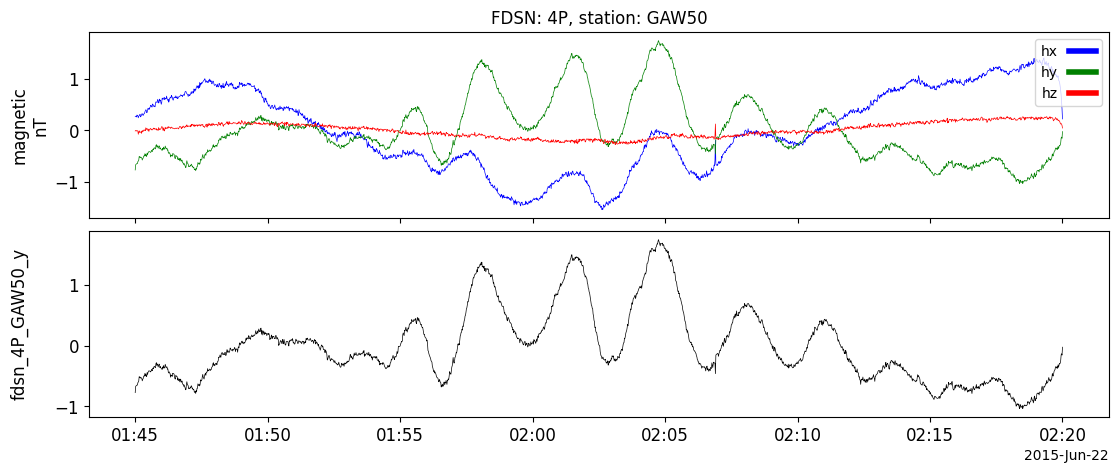

In [6]:
load_fdsn(network="4P", station="GAW50", trange=[date_start, date_end], nodownload=True)

# Split data into individual components
pytplot.split_vec('fdsn_4P_GAW50')

# Plot all data and the y component
pytplot.tplot(['fdsn_4P_GAW50', 'fdsn_4P_GAW50_y'])

# Compare the results

Finally, we can compare the results by plotting de-trended By from all 3 stations. For simply subtract the median value.

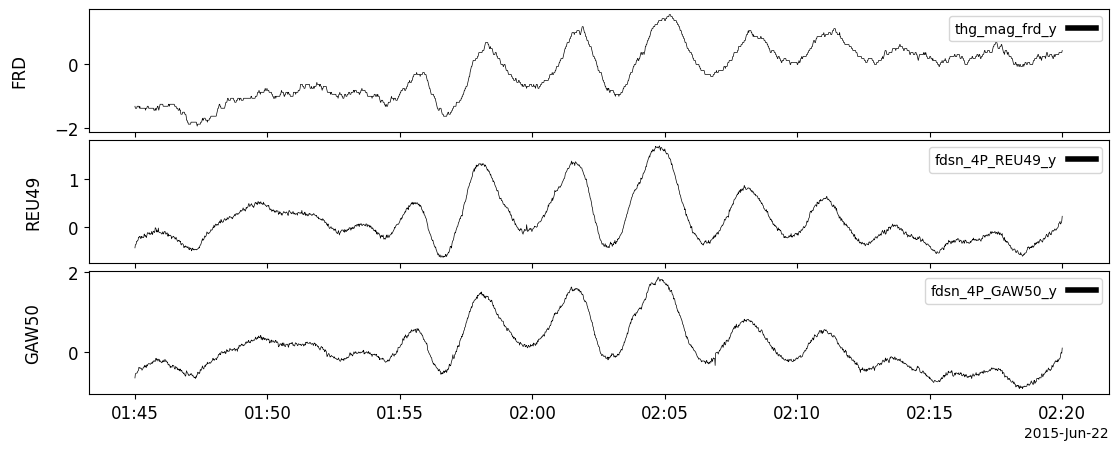

In [7]:
import numpy as np

tplot_vars = ['thg_mag_frd_y', 'fdsn_4P_REU49_y', 'fdsn_4P_GAW50_y']

for var in tplot_vars:
   time, by = pytplot.get_data(var)  # Unpack tplot variable
   by -= np.median(by)  # Subtract median   
   pytplot.options(var, opt_dict={"legend_names": [var], "ytitle": var.split("_")[2].upper()}) #  Customize labels

pytplot.tplot(tplot_vars)

# Handling data from other stations

There could be a scenario when the data from other stations is inconsistent. For example, as of November 2023 the data from the station **REQ48** of the same network **4P** shows significant outlier and potentially flipped. Let's explore this station and plot the results. 


2023-11-30T19:58:09.538257-0800 | INFO | mth5.mth5 | close_mth5 | Flushing and closing c:\work\Data\SPEDAS\mth5\4P_REQ48_20150622T014500_20150622T022000.h5


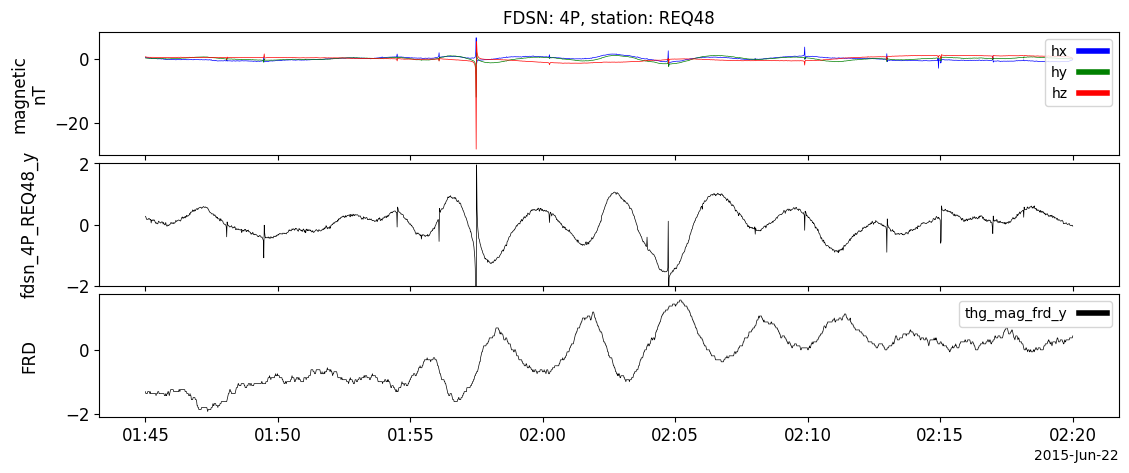

In [8]:
load_fdsn(network="4P", station="REQ48", trange=[date_start, date_end], nodownload=True)
pytplot.split_vec('fdsn_4P_REQ48')
pytplot.options('fdsn_4P_REQ48_y', 'yrange', [-2, 2])  # Manually set the range, because 4P REQ48 have outliers in the signal
pytplot.tplot(['fdsn_4P_REQ48', 'fdsn_4P_REQ48_y', 'thg_mag_frd_y']) # Add FRD station ius added for comparison 

Another scenario is when the IRDS map indicate availability, however the data is unavailable. 
The next example tries to load all stations. If the data is not available the MTH processing raises and exception which can be handed by try-except block. However, you can use flag `noexeptions` to bypass this.

2023-11-30T19:59:55.927084-0800 | INFO | mth5.mth5 | close_mth5 | Flushing and closing c:\work\Data\SPEDAS\mth5\4P_ALW49_20150622T014500_20150622T022000.h5
2023-11-30T19:59:57.378053-0800 | INFO | mth5.mth5 | close_mth5 | Flushing and closing c:\work\Data\SPEDAS\mth5\4P_GAW50_20150622T014500_20150622T022000.h5
2023-11-30T19:59:58.469517-0800 | INFO | mth5.mth5 | close_mth5 | Flushing and closing c:\work\Data\SPEDAS\mth5\4P_REP47_20150622T014500_20150622T022000.h5
2023-11-30T19:59:59.817385-0800 | INFO | mth5.mth5 | close_mth5 | Flushing and closing c:\work\Data\SPEDAS\mth5\4P_REQ48_20150622T014500_20150622T022000.h5
2023-11-30T20:00:01.635495-0800 | INFO | mth5.mth5 | close_mth5 | Flushing and closing c:\work\Data\SPEDAS\mth5\4P_REU49_20150622T014500_20150622T022000.h5
2023-11-30T20:00:01.708451-0800 | WARNING | mth5.mth5 | open_mth5 | 4P_TNU48.h5 will be overwritten in 'w' mode
2023-11-30T20:00:02.114931-0800 | INFO | mth5.mth5 | _initialize_file | Initialized MTH5 0.2.0 file c:\work\

30-Nov-23 20:00:03: Cannot initialize mth5 object
30-Nov-23 20:00:03: Error: fdsn_4P_TNU48 not found in memory.
30-Nov-23 20:00:03: fdsn_4P_TNU48_y is currently not in pytplot.


2023-11-30T20:00:04.555431-0800 | INFO | mth5.mth5 | close_mth5 | Flushing and closing c:\work\Data\SPEDAS\mth5\4P_TNV48_20150622T014500_20150622T022000.h5


30-Nov-23 20:00:04: The name fdsn_4P_TNU48_y is currently not in pytplot
30-Nov-23 20:00:04: The name fdsn_4P_TNU48_y is currently not in pytplot
30-Nov-23 20:00:04: Variable not found: fdsn_4P_TNU48_y


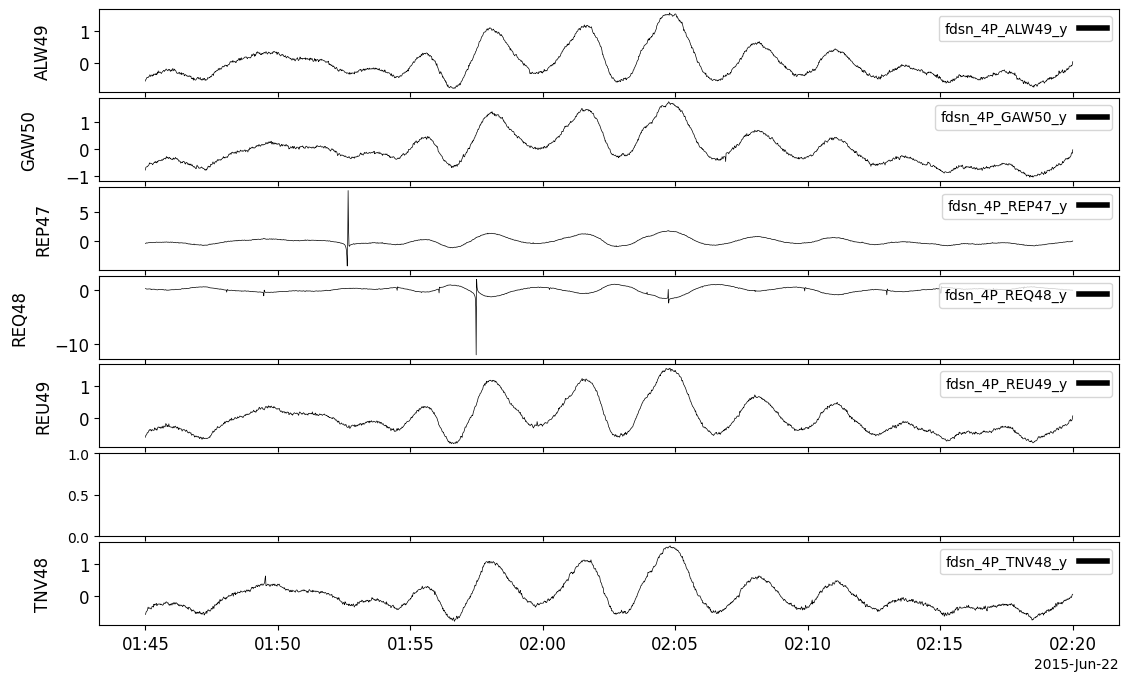

In [11]:
stations = ['ALW49', 'GAW50', 'REP47', 'REQ48', 'REU49', 'TNU48', 'TNV48']
tplot_str = []
for sta in stations:
   load_fdsn(network="4P", station=sta, trange=[date_start, date_end], nodownload=True, noexception=True)   
   pytplot.split_vec(f'fdsn_4P_{sta}')
   var = f'fdsn_4P_{sta}_y'
   tplot_str.append(var)
   pytplot.options(var, opt_dict={"legend_names": [var], "ytitle": var.split("_")[2].upper()}) #  Customize labels

pytplot.tplot(tplot_str)

In the previous example, the data from station **TNU48** has not been created. Next example shows how processing of the absent data can be handled in your code

In [12]:
def tplot_fdsn_station(network, station, trange):
   """Plot data only is load_fdsn does not return an error. Print error details"""

   # tplot variable string
   var = None
   
   try:
      load_fdsn(network=network, station=station, trange=trange)
      var = f'fdsn_{network}_{station}'
   except Exception as E:
      print("FDSN loading error: ", type(E), E)
      
   if var:
      pytplot.tplot(var)
   else:
      # Nothing to plot
      pass

tplot_fdsn_station("4P", "TNU48", [date_start, date_end])

2023-11-30T20:05:22.888658-0800 | WARNING | mth5.mth5 | open_mth5 | 4P_TNU48.h5 will be overwritten in 'w' mode
2023-11-30T20:05:23.316120-0800 | INFO | mth5.mth5 | _initialize_file | Initialized MTH5 0.2.0 file c:\work\Data\SPEDAS\mth5\4P_TNU48.h5 in mode w
2023-11-30T20:05:25.063991-0800 | INFO | mth5.mth5 | close_mth5 | Flushing and closing c:\work\Data\SPEDAS\mth5\4P_TNU48.h5


30-Nov-23 20:05:25: Cannot initialize mth5 object


FDSN loading error:  <class 'IndexError'> index 0 is out of bounds for axis 0 with size 0


Next example simulate the situation when FDSN cannot find or load the data. This will intentionally set not existing station

In [13]:
tplot_fdsn_station("4P", "TNU0", [date_start, date_end])

2023-11-30T20:05:32.911070-0800 | INFO | mth5.mth5 | _initialize_file | Initialized MTH5 0.2.0 file c:\work\Data\SPEDAS\mth5\4P_TNU0.h5 in mode w
2023-11-30T20:05:33.067032-0800 | INFO | mth5.mth5 | close_mth5 | Flushing and closing c:\work\Data\SPEDAS\mth5\4P_TNU0.h5


30-Nov-23 20:05:33: Cannot initialize mth5 object


FDSN loading error:  <class 'obspy.clients.fdsn.header.FDSNNoDataException'> No data available for request.
HTTP Status code: 204
Detailed response of server:
